# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [24]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

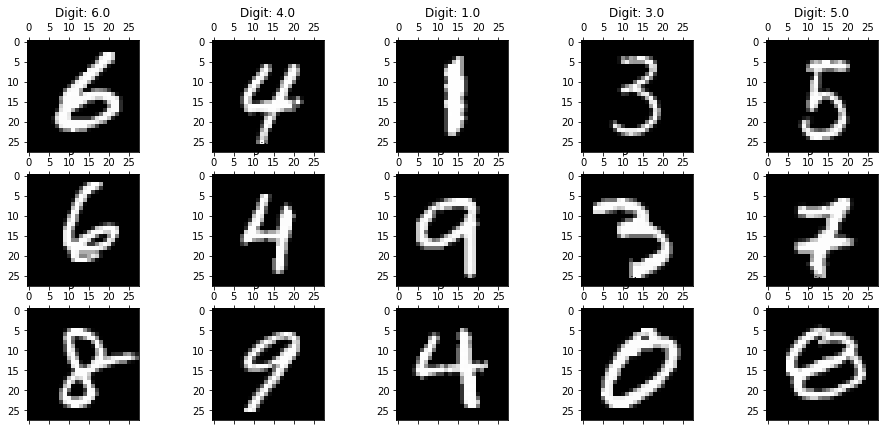

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

## 데이터 스케일링

In [9]:
df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [10]:
X_scaled = X / 255

In [11]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [12]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2)
train_y, test_y = train_y.ravel(), test_y.ravel()

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[-1]-1).fit(train_X)

In [14]:
def ScreePlot(model):
    values = np.arange(len(model.explained_variance_ratio_)) + 1
    var_ratio_cumsum = np.cumsum(model.explained_variance_ratio_)
    plt.plot(values, model.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
    plt.plot(values, var_ratio_cumsum, 'o-', linewidth=1, color='red')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    print(f"elbow point: {np.sum(var_ratio_cumsum<=0.8)}")
    plt.show()


elbow point: 42


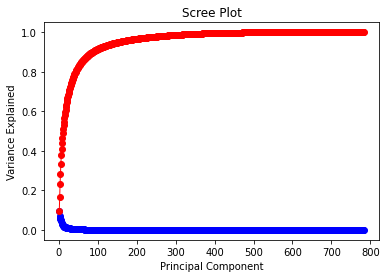

In [15]:
ScreePlot(pca)

#### PCA의 Scree Plot을 보면 빨간색 선은 분산의 누적 합을 나타내고 파란선은 분산의 비중을 나타내고 있습니다. 
#### Epbow point로는 분산의 80퍼센트를 설명가능한 지점인 42로 선택하였습니다.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis().fit(train_X,train_y)

elbow point: 4


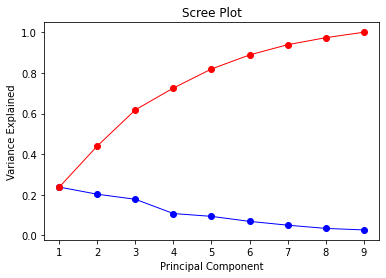

In [17]:
ScreePlot(lda)

#### LDA의 Scree Plot을 보면 주성분 개수가 4개일 때는 대략 70%, 5개일 때는 대략 80% 설명함을 알 수 있습니다. 
#### 따라서 LDA의 주성분 개수를 5로 설정하겠습니다.

In [18]:
pca = PCA(n_components=42).fit(train_X)
pca_train_X = pca.transform(train_X)
pca_test_X = pca.transform(test_X)

In [19]:
lda = LinearDiscriminantAnalysis(n_components=5).fit(train_X,train_y)
lda_train_X = lda.transform(train_X)
lda_test_X = lda.transform(test_X)

In [20]:
print(pca_train_X.shape, pca_test_X.shape)

(56000, 42) (14000, 42)


잘 축소된 것을 볼 수 있습니다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [27]:
from sklearn.metrics import accuracy_score
import time
def metrics(model, test_X, y_true, mode):
    y_pred = model.predict(test_X)
    acc = accuracy_score(y_true, y_pred)
    print(f"{mode} Acc: {acc}")

### Random Forest: 여러 결정 트리로부터 분류한 결과를 투표를 실시하여 가장 높은 투표율의 분류 결과가 나오게끔 동작하는 앙상블 학습 방법의 일종인 모델입니다. 

In [44]:
from sklearn.ensemble import RandomForestClassifier
RFC_clf = RandomForestClassifier(random_state=0)

In [47]:
start = time.time() # 시작 시간
normal_RFC_clf = RFC_clf.fit(train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(normal_RFC_clf, test_X, test_y, 'normal')

start = time.time() # 시작 시간
pca_RFC_clf = RFC_clf.fit(pca_train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(pca_RFC_clf, pca_test_X, test_y, 'pca')

start = time.time() # 시작 시간
lda_RFC_clf = RFC_clf.fit(lda_train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(lda_RFC_clf, lda_test_X, test_y, 'lda')

소요 시간: 34.09554386138916
normal Acc: 0.9680714285714286
소요 시간: 38.75725269317627
pca Acc: 0.9527142857142857
소요 시간: 12.99168086051941
lda Acc: 0.8412142857142857


#### Random Forest Training 결과
##### Time: LDA -> Normal -> PCA
##### Acc: Normal -> PCA -> LDA

### Support Vector Machine: 클래스를 분류하는 결정 경계의 마진이 최대한 높게 끔 만들어주는 알고리즘입니다.

In [48]:
from sklearn.svm import SVC
SVC_clf = SVC(random_state=0)

In [51]:
start = time.time() # 시작 시간
normal_SVC_clf = SVC_clf.fit(train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(normal_SVC_clf, test_X, test_y, 'normal')

start = time.time() # 시작 시간
pca_SVC_clf = SVC_clf.fit(pca_train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(pca_SVC_clf, pca_test_X, test_y, 'pca')

start = time.time() # 시작 시간
lda_SVC_clf = SVC_clf.fit(lda_train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(lda_SVC_clf, lda_test_X, test_y, 'lda')

소요 시간: 166.4505159854889
normal Acc: 0.9772857142857143
소요 시간: 28.565608978271484
pca Acc: 0.9808571428571429
소요 시간: 19.60796308517456
lda Acc: 0.8437142857142857


#### Support Vector Machine Training 결과
##### Time: LDA -> PCA -> Normal
##### Acc:  PCA-> Normal -> LDA

### Logistic Regression: 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0~1사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 알고리즘입니다.

In [56]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=0,solver='lbfgs', max_iter=100)

In [105]:
start = time.time() # 시작 시간
normal_LR_clf = LR_clf.fit(train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(normal_LR_clf, test_X, test_y, 'normal')

start = time.time() # 시작 시간
pca_LR_clf = LR_clf.fit(pca_train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(pca_LR_clf, pca_test_X, test_y, 'pca')

start = time.time() # 시작 시간
lda_LR_clf = LR_clf.fit(lda_train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(lda_LR_clf, lda_test_X, test_y, 'lda')

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


소요 시간: 12.138548135757446
normal Acc: 0.9207857142857143


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


소요 시간: 1.732038974761963
pca Acc: 0.905
소요 시간: 0.926232099533081
lda Acc: 0.8246428571428571


#### Logistic Regression Training 결과
##### Time: LDA -> PCA -> Normal
##### Acc:  Normal -> PCA -> LDA

### K-Nearest Neighbors: 새로운 데이터가 들어왔을 때 K개의 가장 가까운 데이터를 찾고, 찾은 데이터의 라벨의 수에 따라서 분류해주는 알고리즘입니다.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=3)

In [32]:
start = time.time() # 시작 시간
normal_KNN_clf = KNN_clf.fit(train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(normal_KNN_clf, test_X, test_y, 'normal')

start = time.time() # 시작 시간
pca_KNN_clf = KNN_clf.fit(pca_train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(pca_KNN_clf, pca_test_X, test_y, 'pca')

start = time.time() # 시작 시간
lda_KNN_clf = KNN_clf.fit(lda_train_X, train_y)
end = time.time() # 끝 시간
print(f"소요 시간: {end-start}")
metrics(lda_KNN_clf, lda_test_X, test_y, 'lda')

소요 시간: 0.033370018005371094
normal Acc: 0.9707857142857143
소요 시간: 0.0072040557861328125
pca Acc: 0.9771428571428571
소요 시간: 0.038771867752075195
lda Acc: 0.8215


#### K-Nearest Neighbors 결과
##### Time: PCA -> Normal -> LDA
##### Acc: PCA -> Normal -> LDA

## 가장 Acc가 높은 모델은 SVC이며, 입력을 PCA로 전처리 했을 때 성능이 높게 나왔습니다. 

정한 틀 없이 자유롭게 해주시면 됩니다!